In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

## Nonparametric statistical significance tests

non_parametric_tests_assign_solution.ipynb

Complete the assignment below.

References:
- Nonparametric Statistics for Non-Statisticians: A Step-by-Step Approach, 2009.
- How to Calculate Nonparametric Statistical Hypothesis Tests in Python, Jason Brownlee, 2018.


## Assignment

### Exercise 1

Our first dataset includes a very famous dataset, the Winsconsin Breast cancer dataset which is also available in https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic). It includes features for cell nuclei for two categories of tumors: malignant and benign. As explained in the original data source:

>Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

Dataset:
- https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/breast_cancer.csv

We will be using three of these features for our exercise: 
- diagnosis: the classification of the tumor with values "M" (malignant) and "B" (benign).
- area_mean: the average area covered by the tumor cells
- concavity_mean: severity of concave portions of the contour
- texture_mean: standard deviation of gray-scale values

For the three features described above(area_mean, concavity_mean, texture_mean), is there a difference in their average values in the two diagnosis groups? (Do samples of these features originate from the same distribution?)
- Select and apply the appropriate statistical test.
- Provide brief rationale for your selection of statistical test.
- Generate boxplots to compare experimental vs. control for t1, t2, and t3.


In [2]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats

import seaborn as sns
import statsmodels.api as sm

<IPython.core.display.Javascript object>

In [3]:
df = pd.read_csv(
    "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/breast_cancer.csv"
)
#df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<IPython.core.display.Javascript object>

In [4]:
df = df[["diagnosis", "area_mean", "concavity_mean", "texture_mean"]]
df.head()

,diagnosis,area_mean,concavity_mean,texture_mean
0,M,1001.0,0.3001,10.38
1,M,1326.0,0.0869,17.77
2,M,1203.0,0.1974,21.25
3,M,386.1,0.2414,20.38
4,M,1297.0,0.1980,14.34


<IPython.core.display.Javascript object>

In [ ]:
# Check the distribution of classes for the the diagnosis column

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 4 columns):
diagnosis         569 non-null object
area_mean         569 non-null float64
concavity_mean    569 non-null float64
texture_mean      569 non-null float64
dtypes: float64(3), object(1)
memory usage: 17.9+ KB


We explore if the referenced features follow a normal distribution. We examine the skewness and kurtosis of the groups.

Optional: We can run a Jarque–Bera test which tests if the data have the skewness and kurtosis matching a normal distribution.
In the case of the Jarque–Bera test the null hypothesis would state that the skewness and kurtosis matches that of a normal distribution.

In [ ]:
# Print the skewness and kurtosis of the groups. Optionally run a Jarque–Bera
# Afterwards you can comment your findings wether the features follow a normal distribution of not.

In [5]:
stats.describe(df["area_mean"])

DescribeResult(nobs=569, minmax=(143.5, 2501.0), mean=654.8891036906855, variance=123843.55431768115, skewness=1.6413905092044112, kurtosis=3.609761264823108)

<IPython.core.display.Javascript object>

In [6]:
stats.describe(df["concavity_mean"])

DescribeResult(nobs=569, minmax=(0.0, 0.4268), mean=0.0887993158172232, variance=0.006355247900423129, skewness=1.3974832352826647, kurtosis=1.9705916515788928)

<IPython.core.display.Javascript object>

In [7]:
stats.describe(df["texture_mean"])

DescribeResult(nobs=569, minmax=(9.71, 39.28), mean=19.289648506151142, variance=18.49890867905146, skewness=0.6487335672867015, kurtosis=0.74114542022429)

<IPython.core.display.Javascript object>

In [9]:
malignant = df[df.diagnosis == "M"][["area_mean", "concavity_mean", "texture_mean"]]
benign = df[df.diagnosis == "B"][["area_mean", "concavity_mean", "texture_mean"]]

<IPython.core.display.Javascript object>

In [ ]:
# Plot the histograms for the distribution of each feature and for each class (malignant/benign) to visually explore 
# wether these distributions are skewed or not.

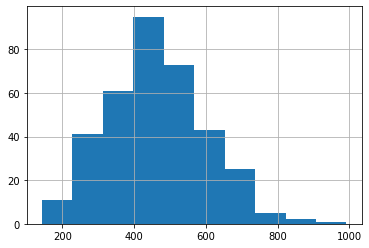

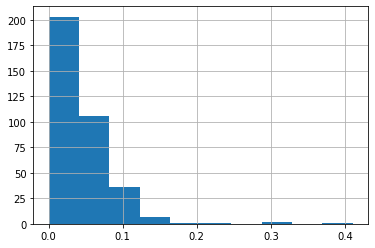

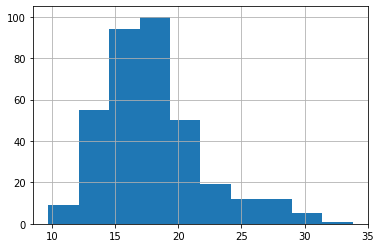

<IPython.core.display.Javascript object>

In [13]:
benign["area_mean"].hist()
plt.show()
benign["concavity_mean"].hist()
plt.show()
benign["texture_mean"].hist()
plt.show()

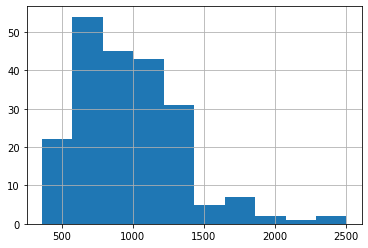

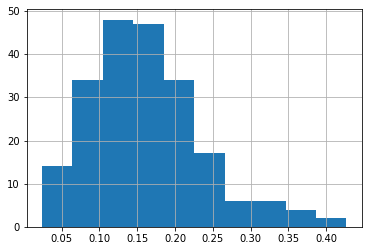

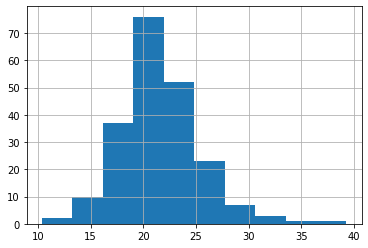

<IPython.core.display.Javascript object>

In [29]:
malignant["area_mean"].hist()
plt.show()
malignant["concavity_mean"].hist()
plt.show()
malignant["texture_mean"].hist()
plt.show()

#not same scale so it's not working to plot all of them on the same graph
# plt.hist(malignant["area_mean"], alpha = 0.5)
# plt.hist(malignant["concavity_mean"],alpha = 0.5)
# plt.hist(malignant["texture_mean"], alpha = 0.5)
# plt.show()


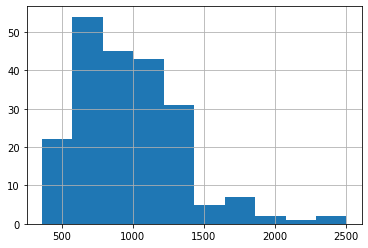

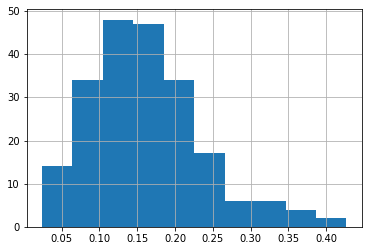

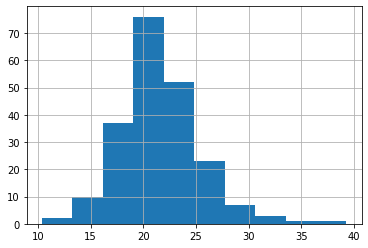

<IPython.core.display.Javascript object>

In [30]:
malignant["area_mean"].hist()
plt.show()
malignant["concavity_mean"].hist()
plt.show()
malignant["texture_mean"].hist()
plt.show()

In [ ]:
# Run 3 Kruskal-Wallis tests, one for each group/feature and describe the results of these tests. 
# State wether the null hypothesis will be rejected or not.

In [20]:
stats.kruskal(malignant["area_mean"], benign["area_mean"])

KruskalResult(statistic=306.1155244413551, pvalue=1.5326695021713592e-68)

<IPython.core.display.Javascript object>

In [21]:
stats.kruskal(malignant["texture_mean"], benign["texture_mean"])

KruskalResult(statistic=121.22093055992241, pvalue=3.418605714119009e-28)

<IPython.core.display.Javascript object>

In [22]:
stats.kruskal(malignant["concavity_mean"], benign["concavity_mean"])

KruskalResult(statistic=305.43657612021565, pvalue=2.1545636238729746e-68)

<IPython.core.display.Javascript object>

In [ ]:
# Afterwards create 3 boxplots: one for each feature grouped by the diagnosis class.

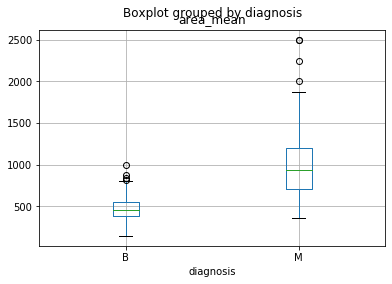

<IPython.core.display.Javascript object>

In [17]:
df.boxplot(by="diagnosis", column="area_mean")
plt.show()

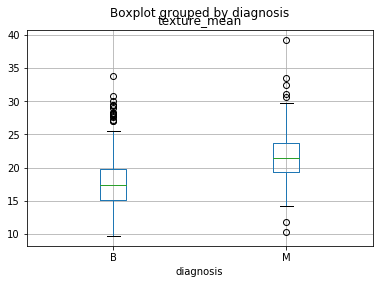

<IPython.core.display.Javascript object>

In [31]:
df.boxplot(by="diagnosis", column="texture_mean")
plt.show()

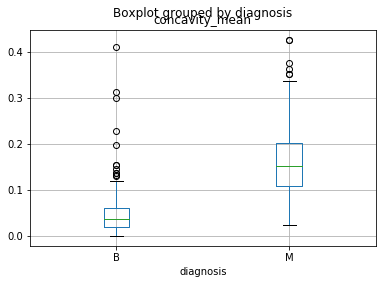

<IPython.core.display.Javascript object>

In [32]:
df.boxplot(by="diagnosis", column="concavity_mean")
plt.show()

In [59]:
# sm.qqplot(malignant["area_mean"], line="s")
# sm.qqplot(malignant["texture_mean"], line="s")
# sm.qqplot(malignant["concavity_mean"], line="s")
# plt.show

<IPython.core.display.Javascript object>

In [58]:
# sm.qqplot(benign["area_mean"], line="s")
# sm.qqplot(benign["texture_mean"], line="s")
# sm.qqplot(benign["concavity_mean"], line="s")
# plt.show

<IPython.core.display.Javascript object>

In [57]:
# Confidence Interval


def calc_95_ci(x1, x2):
    signal = x1.mean() - x2.mean()
    noise = np.sqrt(x1.std() ** 2 / x1.size + x2.std() ** 2 / x2.size)

    ci_low = signal - 1.96 * noise
    ci_hi = signal + 1.96 * noise

    return (ci_low, ci_hi)

<IPython.core.display.Javascript object>

In [60]:
calc_95_ci(malignant["area_mean"], benign["area_mean"])

(464.1351984332775, 567.0372395985389)

<IPython.core.display.Javascript object>

In [61]:
calc_95_ci(malignant["texture_mean"], benign["texture_mean"])

(3.0339447927021377, 4.34634271852878)

<IPython.core.display.Javascript object>

In [62]:
calc_95_ci(malignant["concavity_mean"], benign["concavity_mean"])

(0.10365862591783591, 0.12577556602762158)

<IPython.core.display.Javascript object>

### Exercise 2

For the following test we will use the Real GDP per capita dataset for Europe available by Eurostat from the following address https://ec.europa.eu/eurostat/web/products-datasets/-/sdg_08_10
It contains the GDP per capita for each country (The indicator is calculated as the ratio of real GDP to the average population of a specific year.)
We will use the years 2007, 2008 and 2009 to check if the economic crisis of 2008 affected the GDP values of europe.

Dataset:
- https://ec.europa.eu/eurostat/web/products-datasets/-/sdg_08_10


Questions:

Is there a difference in the GDP per capita between the years (2007 and 2008), (2008 and 2009)?
- Select and apply the appropriate statistical test.


Our dataset needs some cleaning at first. We extract only the columns of interest, clean numeric columns of unwanted characters and convert these columns to numeric.
We also remove rows that refer to collective index for many countries ("EA19", "EU27","EU28") and keep individual countries.

In [38]:
gdp = pd.read_csv(
    "https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?file=data/sdg_08_10.tsv.gz",
    compression="gzip",
    sep=r"\,|\t",
    usecols=["unit", "geo\\time", "2007 ", "2008 ", "2009 "],
    engine="python",
)
gdp = gdp[gdp.unit == "CLV10_EUR_HAB"].drop(["unit"], axis=1)
gdp.columns = ["country", "2007", "2008", "2009"]
gdp = gdp[~gdp.country.isin(["EA19", "EU27", "EU28"])]
gdp["2007"] = gdp["2007"].str.extract("(\d+)", expand=False).astype(int)
gdp["2008"] = gdp["2008"].str.extract("(\d+)", expand=False).astype(int)
gdp["2009"] = gdp["2009"].str.extract("(\d+)", expand=False).astype(int)
gdp.head()

,country,2007,2008,2009
0,AT,35870,36280,34830
1,BE,33760,33640,32700
2,BG,4820,5140,4990
3,CH,57720,58620,56750
4,CY,24420,24680,23550


<IPython.core.display.Javascript object>

In [39]:
gdp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 0 to 37
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  36 non-null     object
 1   2007     36 non-null     int64 
 2   2008     36 non-null     int64 
 3   2009     36 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.4+ KB


<IPython.core.display.Javascript object>

In [40]:
gdp.describe()

,2007,2008,2009
count,36.000000,36.000000,36.000000
mean,25407.222222,25365.000000,24060.833333
std,18827.493970,18451.582123,17629.764989
min,3200.000000,3370.000000,3350.000000
25%,10355.000000,10415.000000,9632.500000
50%,23440.000000,23285.000000,22225.000000
75%,35937.500000,36025.000000,33677.500000
max,84420.000000,81880.000000,76900.000000


<IPython.core.display.Javascript object>

Data that refer to economic indices usually do not follow a normal distribution, something we can easily observe by visualizing the data below, hence we should use non parametric tests.

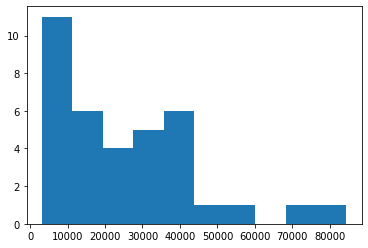

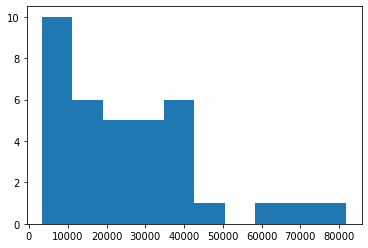

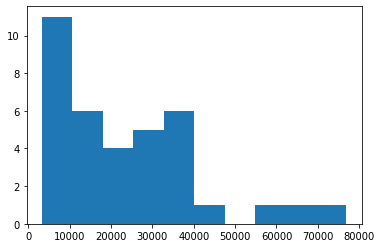

<IPython.core.display.Javascript object>

In [64]:
# Plot the histogram for the values of each year.
plt.hist(gdp["2007"])
plt.show()
plt.hist(gdp["2008"])
plt.show()
plt.hist(gdp["2009"])
plt.show()

# plt.hist(gdp["2007"], alpha = 0.5)
# plt.hist(gdp["2008"], alpha = 0.3)
# plt.hist(gdp["2009"], alpha = 0.1)
# plt.show()


We will run a Wilcoxon Signed-rank Test, which should be run on paired samples or repeated measurements on a single sample. In our case we have repeated measurements (three years) of GDP for the same countries.

The null hypothesis for this test is that the medians of two samples are equal.
First we compare 2007 with 2008 values:

In [52]:
# Run a Wilcoxon Signed-rank test for years (groups) 2007 and 2008 and describe the results of the test.
stats.wilcoxon(gdp["2007"], gdp["2008"])

WilcoxonResult(statistic=278.5, pvalue=0.39180684742166216)

<IPython.core.display.Javascript object>

In [51]:
# Run a Wilcoxon Signed-rank Test for years (groups) 2008 and 2009 and describe the results of the test.
stats.wilcoxon(gdp["2008"], gdp["2009"])

WilcoxonResult(statistic=4.0, pvalue=2.356281382362627e-07)

<IPython.core.display.Javascript object>

There is a significant statistical difference between the means for 2008 2009 indicators which translate that the economic crisis of 2008 did affect the GDP values of Europe for 2009.

In [55]:
# Confidence Interval


def calc_95_ci(x1, x2):
    signal = x1.mean() - x2.mean()
    noise = np.sqrt(x1.std() ** 2 / x1.size + x2.std() ** 2 / x2.size)

    ci_low = signal - 1.96 * noise
    ci_hi = signal + 1.96 * noise

    return (ci_low, ci_hi)

<IPython.core.display.Javascript object>

In [56]:
calc_95_ci(gdp["2008"], gdp["2009"])

(-7032.360883618683, 9640.694216952019)

<IPython.core.display.Javascript object>